## Introducción a Aprendizaje Automatico: Proyecto de Random Forest
Diplomado de Inteligencia Artificial
### Información del Estudiante:
1.   **Nombre:** Miguel Antonio Araujo
2.   **Titulo del Proyecto:** Heart Disease UCI

# SECCIÓN: Preguntas del Problema

## 1.	¿Qué problemas trataste de resolver? ¿Qué estas tratando de predecir? Describe el problema y objetivo.
El problema consiste en que un paciente tiene varios síntomas representados en forma de datos clínicos y se necesita predecir si tiene o no enfermedad en el corazón.

## 2.	¿Como evaluaras tus resultados? Especifica qué medida de evaluación y explica brevemente porqué.
Primero, utilice la métrica "Accuracy" porque en clasificación, es probablemente una de las más usadas, junto a "Precision". También, esta es pedida en la rúbrica. Por otro lado, utilice la matriz de confusión como segunda métrica debido a que permite visualizar el rendimiento del modelo.

## 3.	¿Qué base de datos usaste? ¿Tuviste que hacer algún procesamiento? Describe brevemente el proceso y enlace de la base de datos.
Utilicé la base de datos "Heart Disease UCI" encontrada en [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). Esta en formato CSV. La descargué y la subí a [ShareCSV.com](http://www.sharecsv.com/s/5a933a3a92b416d86f245812dad773e1/heart_dataset.csv) para facilitar el uso en Google Colab.

El dataset encontrado en Kaggle ya fue procesado/limpiado de la fuente (que puede ser vista en el link de Kaggle arriba). Los datos originales contienen más de 70 atributos y el usuario de Kaggle lo redujo a 14. Por esto, no tuve que hacer ningún procesamiento/limpieza.

## 4.	¿Qué herramientas y librerías usaste?
- Google Colab
- Scikit-Learn
- Numpy
- Pandas
- Matplotlib

## 5.	Lista referencias de diferentes resultados de esa base de datos. ¿Cómo se comporta tus resultados contra lo de otra persona?
[Referencia de resultados de usuario de Kaggle](https://www.kaggle.com/vbmokin/heart-disease-comparison-of-20-models/output)

Este usuario probo varios algoritmos de clasificación, Random Forest incluido. En sus pruebas, el Random Forest fue la que mejor puntuación de "Accuracy" tuvo.
La puntuación obtenida por dicho usuario fue de 85.25%, mientras que mi resultado fue de 90.16%. Este porcentaje de diferencia se tradujo a alrededor de 2-4 falsos positivos (FP) y falsos negativos (FN) menos que los resultados de la otra persona.

# SECCIÓN: Código
Favor colocar el proceso cubriendo de manera detalla el proceso y explicando que se está realizando en dicho bloque de código. Cubrir mínimo: importación de librerias necesarias, carga de datos, preparación de datos, separación en entrenamiento y prueba, instancia, fitting, predicción, métrica de precisión.

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar dataset
df = pd.read_csv("http://www.sharecsv.com/dl/5a933a3a92b416d86f245812dad773e1/heart_dataset.csv")

# Explorar los datos del dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Describir los datos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Variable Y
labels = np.array(df['target'])

# Variable X. Eliminar columna 'target' correspondiente a los labels/variable Y
features = df.drop('target', axis = 1)

# Convertir a array (Numpy)
features = np.array(features)

In [105]:
# Crear los diferentes sets de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size = 0.2, random_state=8)

In [112]:
# Crear clasificador de Random Forest
from sklearn.ensemble import RandomForestClassifier

clsf = RandomForestClassifier(n_estimators=300, random_state=26)

# Entrenar clasificador
clsf.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = clsf.predict(X_test)

## Metricas de evaluacion
Para las metricas de evaluacion, utilice la de precision/accuracy, y para la adicional, la matriz de confusion (grafica)

In [116]:
# Usar metricas de evaluacion
from sklearn import metrics

# Primera metrica de evaluacion: Accuracy
print("Accuracy:", f"{round(metrics.accuracy_score(y_test, y_pred) * 100, 2)}%")

Accuracy: 90.16%


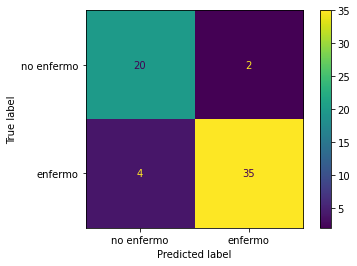

In [117]:
# Segunda metrica de evaluacion: Matriz de Confusion
metrics.plot_confusion_matrix(clsf, X_test, y_test, display_labels=['no enfermo', 'enfermo'])

In [114]:
# Comparando valores de prueba con los predecidos
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predecido': y_pred.flatten()})
df_results

,Actual,Predecido
0,1,1
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
56,1,1
57,1,1
58,0,0
59,1,1
